# Plot stations

In [1]:
%matplotlib inline
import matplotlib.pyplot as pp
import numpy as np
import pandas as pd
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
import fiona
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch

In [2]:
# Get bounding box for Chicago
sfname = 'chi_ca/chi_ca'

s_lat = 41.735  # 87th street
n_lat = 42.069  # Wilmette
w_lon = -87.816  # Forest Park
e_lon = -87.524  # State line

map = Basemap(projection='tmerc', ellps='WGS84',
              lon_0=0.5*(w_lon + e_lon),
              lat_0=0.5*(s_lat + n_lat),
              llcrnrlon=w_lon, llcrnrlat=s_lat,
              urcrnrlon=e_lon, urcrnrlat=n_lat,
              resolution='i', suppress_ticks=True)

map.readshapefile(sfname, name='chicago',
                  drawbounds=False, color='none', zorder=2)
pass

In [3]:
# Read station data
stations = pd.read_csv('stations.csv')

# Convert station lon,lat to mapped x,y
stations['map_point'] = [Point(map(x, y)) for x, y in zip(stations['longitude'], stations['latitude'])]
stations.set_index('id', inplace=True)

In [4]:
# Read neighborhoods shapefile
hoods = pd.DataFrame({'poly': [Polygon(xy) for xy in map.chicago],
                      'name': [n['community'] for n in map.chicago_info]})

# Create a patch for each neighborhood
hoods['patch'] = hoods['poly']\
    .map(lambda x: PolygonPatch(x, fc='#AAAAAA',
                                ec='#000000', lw=.25, alpha=.9,
                                zorder=1))

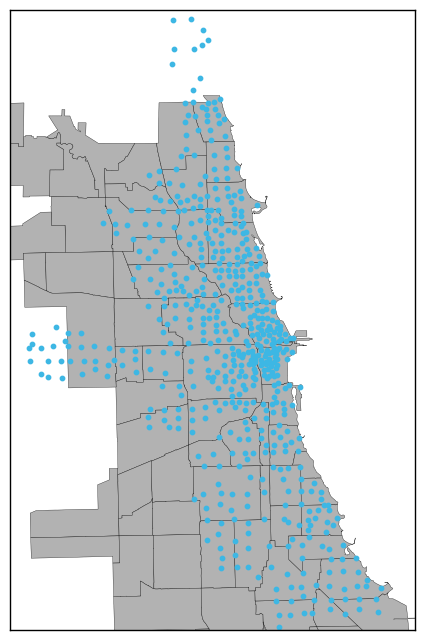

In [5]:
fig = pp.figure(figsize=(8, 8))
ax = pp.axes()

map.scatter([pt.x for pt in stations['map_point']],
            [pt.y for pt in stations['map_point']],
            s=10, facecolor='#3db7e4', edgecolor='#3db7e4', zorder=2)

ax.add_collection(PatchCollection(hoods['patch'].values, match_original=True))

pp.show()